In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytanie danych

In [84]:
student_performance_data = pd.read_csv("student_performance_scaled.csv")

In [85]:
student_performance_data.head()

,Previous Scores,Extracurricular Activities,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Scores
0,0.49,1,0.775188,1.456205,-1.249754,0.41
1,0.32,0,-0.383481,-1.492294,-0.900982,0.15
2,0.01,1,1.161410,0.276805,-0.900982,-0.05
3,0.02,1,0.002742,-0.902594,-0.900982,-0.14
4,0.25,0,0.775188,0.866505,0.145333,0.16


### Podział zbioru

In [86]:
X = student_performance_data.drop(columns=["Scores"])
y = student_performance_data["Scores"]

from sklearn.model_selection import train_test_split

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

### Podstawowa sieć

In [88]:
import keras
from keras import layers

In [89]:
model = keras.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(1, activation="linear")
])

In [90]:
model.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
optimizer = keras.optimizers.Adam(
  learning_rate=0.001
)

In [92]:
model.compile(
    optimizer= optimizer,
    loss="mse"
)

In [93]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=32
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0594 - val_loss: 0.0068
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

In [94]:
history.history

{'loss': [0.059356868267059326,
  0.005328107159584761,
  0.003382808528840542,
  0.002555644605308771,
  0.0021241260692477226,
  0.0018490506336092949,
  0.0016114815371111035,
  0.0014734534779563546,
  0.001345588592812419,
  0.001271548680961132,
  0.001147767063230276,
  0.0011448441073298454,
  0.001062459428794682,
  0.0010618421947583556,
  0.000998480012640357,
  0.0009576469310559332,
  0.000994927017018199,
  0.0009900976438075304,
  0.000878383289091289,
  0.0008453565533272922,
  0.0008503611898049712,
  0.0008370190626010299,
  0.0008400138467550278,
  0.0007881745113991201,
  0.0007719179848209023,
  0.0007743482128717005,
  0.0007734817336313426,
  0.000739782175514847,
  0.0008209230727516115,
  0.0007376661524176598,
  0.0007572617614641786,
  0.0007517349440604448,
  0.0006533146370202303,
  0.0007273801602423191,
  0.000647005916107446,
  0.0006744079873897135,
  0.0006198887131176889,
  0.0006320095271803439,
  0.0006261789239943027,
  0.0006781209376640618,
  0.0

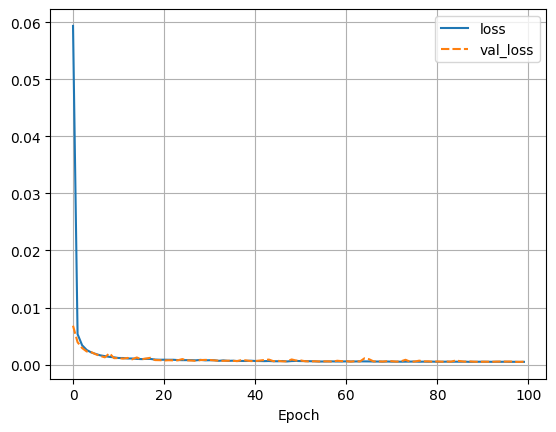

In [95]:
def display_history(history):
  sns.lineplot(history.history)
  plt.grid()
  plt.xlabel("Epoch")

display_history(history)

In [98]:
predictions = model.predict(X_test)

predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[-0.3748224 ],
       [ 0.40003547],
       [-0.12609424],
       ...,
       [ 0.17541726],
       [ 0.12493326],
       [ 0.35192198]], shape=(1500, 1), dtype=float32)

In [101]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions) * 100

print(f"Wynik MAE: {mae:.4f}")

Wynik MAE: 1.8219


### Monitorowanie funkcji straty na zbiorze walidacyjnym